In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import pyro.distributions as dist

In [27]:
Ehigh = 12e10
Elow = 9e10
E_mean = 2.5e9
E_var = 2e8

rhohigh = 1.24e3
rholow = 124.0
rho_theo = 8.46e3
rho_mean = 1.24e3
rho_var = 124.0

etahigh = 0.01
etalow = 0.0001
eta_theo = 0.007
eta_mean = 0.05
eta_var = 30

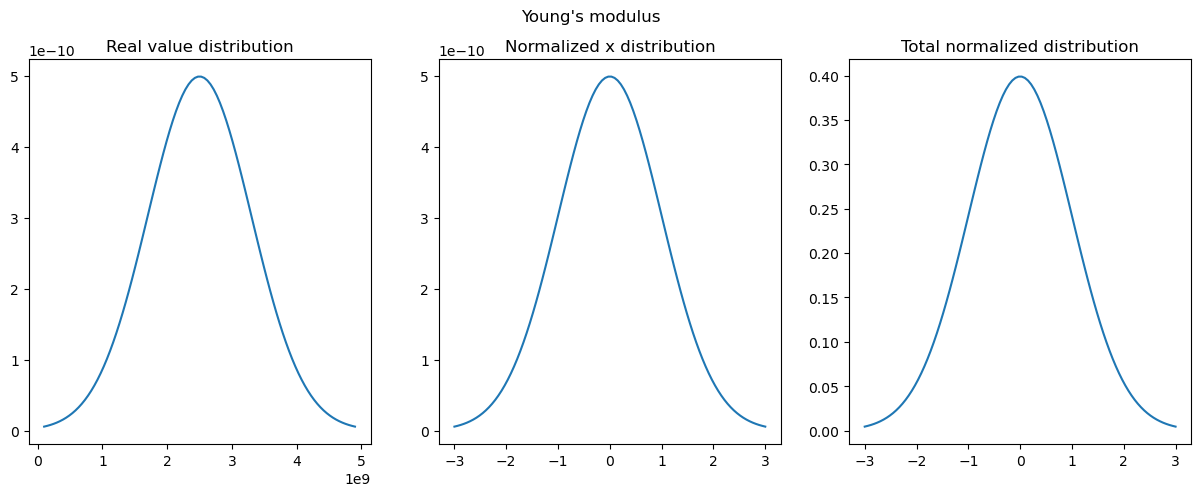

In [29]:
var = 0.8e9
#
# plt.plot(x, stats.norm.pdf(x, E_mean, var))
plt.figure(figsize=[15,5])
plt.suptitle("Young's modulus")

plt.subplot(1,3,1)
plt.title("Real value distribution")
x = np.linspace(- 3*var, 3*var, 100) + E_mean
dist = stats.norm.pdf(x, E_mean, var)
plt.plot(x, dist)

var_norm = 1
x_norm = (x - E_mean) /var

plt.subplot(1,3,2)
plt.title("Normalized x distribution")
plt.plot(x_norm, dist)

plt.subplot(1,3,3)
plt.title("Total normalized distribution")
plt.plot(x_norm, dist * var)
#plt.xlim(Ehigh, Elow)

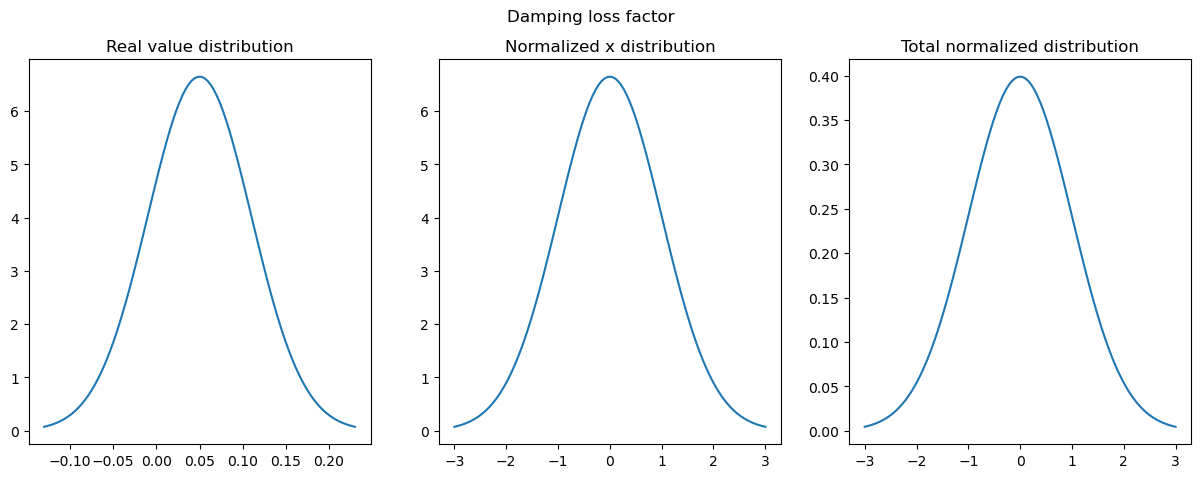

In [21]:
var = 0.06
#
# plt.plot(x, stats.norm.pdf(x, E_mean, var))
plt.figure(figsize=[15,5])
plt.suptitle("Damping loss factor")

plt.subplot(1,3,1)
plt.title("Real value distribution")
x = np.linspace(- 3*var, 3*var, 100) + eta_mean
dist = stats.norm.pdf(x, eta_mean, var)
plt.plot(x, dist)

var_norm = 1
x_norm = (x - eta_mean) /var

plt.subplot(1,3,2)
plt.title("Normalized x distribution")
plt.plot(x_norm, dist)

plt.subplot(1,3,3)
plt.title("Total normalized distribution")
plt.plot(x_norm, dist * var)
#plt.xlim(Ehigh, Elow)

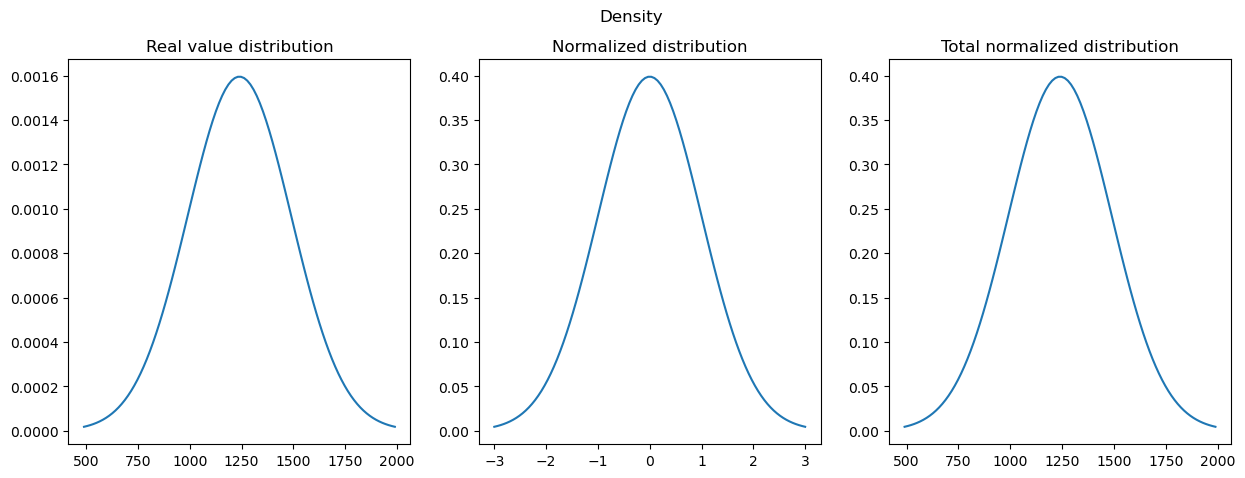

In [24]:
var = 250
#
# plt.plot(x, stats.norm.pdf(x, E_mean, var))
plt.figure(figsize=[15,5])
plt.suptitle("Density")

plt.subplot(1,3,1)
plt.title("Real value distribution")
x = np.linspace(- 3*var, 3*var, 100) + rho_mean
dist = stats.norm.pdf(x, rho_mean, var)
plt.plot(x, dist)

x_norm = (x - rho_mean) / var

plt.subplot(1,3,2)
plt.title("Normalized distribution")
plt.plot(x_norm, dist * var)

plt.subplot(1,3,3)
plt.title("Total normalized distribution")
plt.plot(x_norm*var+rho_mean, dist * var)
#plt.xlim(Ehigh, Elow)

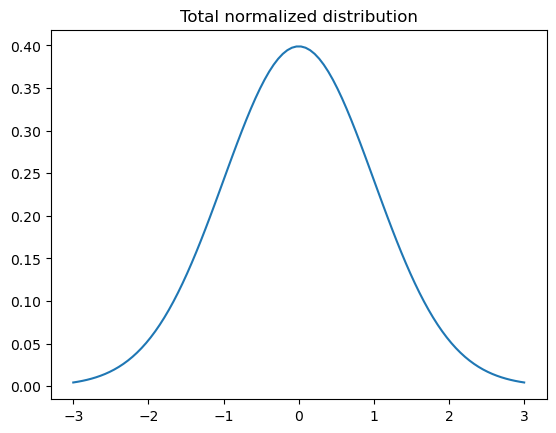

In [88]:

plt.plot()
plt.title("Total normalized distribution")
var=1
x = np.linspace(- 3*var, 3*var, 100)
plt.plot(x_norm, stats.norm.pdf(x, 0, var))

# Nyquist plot (Flat beam)
    * 1. Determine the transfer function (mobility in this case)
    * 2. Draw polar plot of the transfer function

In [2]:
import control
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

90


Text(0, 0.5, 'Mobility / dB')

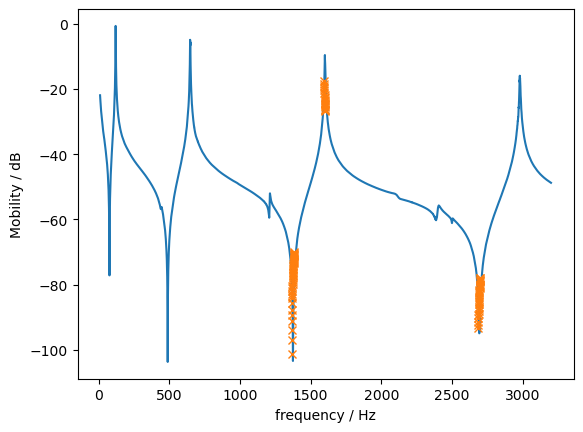

In [7]:
experiment = pd.read_csv("../Data/bend/centerFreqResponse.csv")[20:]
# Mobility value calculated from input data and converted to torch
mobility = abs(experiment["force"].values + 1j*experiment["velocity"].values)
freq = experiment["freq"]
plt.plot(freq, 20*np.log10(mobility))
axis = np.concatenate([np.arange(2730, 2770), np.arange(3190, 3210), np.arange(5370, 5400)])
print(len(axis))
plt.plot(freq[axis], 20*np.log10(mobility[axis]), "x")
plt.xlabel("frequency / Hz")
plt.ylabel("Mobility / dB")

Text(0, 0.5, 'Imaginary part')

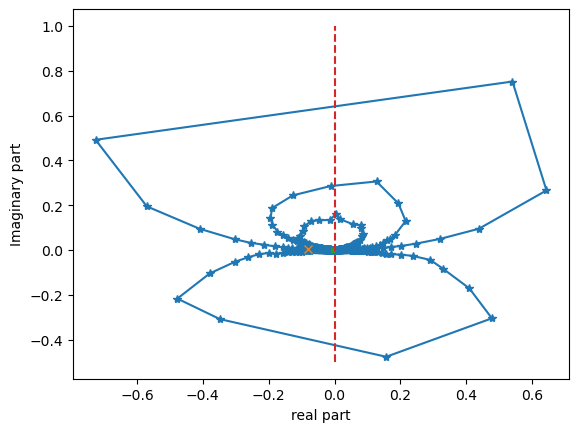

In [8]:
mobility = experiment["force"].values + 1j*experiment["velocity"].values
mobility = mobility#[2000:4500]
resonance = mobility[800:1600]
plt.plot(mobility.real, mobility.imag, "*-")
plt.plot(mobility[0].real, mobility[0].imag, "x")
plt.plot(mobility[-1].real, mobility[-1].imag, ".")
plt.plot(np.zeros(2), [-0.5, 1], "--")
plt.xlabel("real part")
plt.ylabel("Imaginary part")

(-1.0, 1.0)

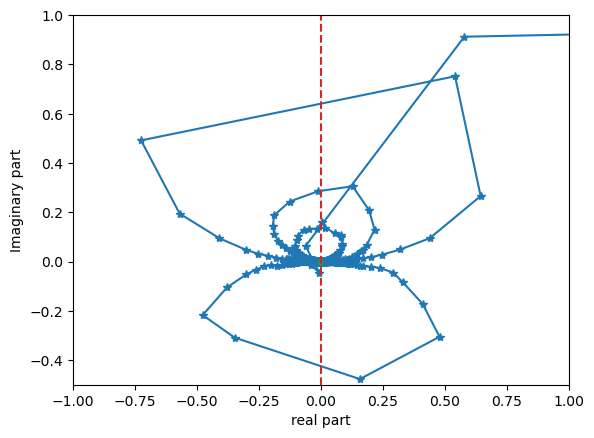

In [74]:
import cmath
mobility = experiment["force"].values + 1j*experiment["velocity"].values
mobility = mobility#[2000:4500]
resonance = mobility[800:1600]
plt.plot(mobility.real, mobility.imag, "*-")
plt.plot(mobility[0].real, mobility[0].imag, "x")
plt.plot(mobility[-1].real, mobility[-1].imag, ".")
plt.plot(np.zeros(2), [-0.5, 1], "--")
plt.xlabel("real part")
plt.ylabel("Imaginary part")
plt.ylim([-0.5, 1])
plt.xlim([-1, 1])

# Nyquist plot (Laser)

In [78]:
import scipy.io as sio

data = sio.loadmat("../Data/laser/references/scanFlatBeamCornerMiddleLimit.mat")
ref = sio.loadmat("../Data/laser/references/curveBeamRefCenter.mat")

In [79]:
tf = data["y_FRF_disp"][0]/ref["y_FRF_disp"][0]
tf = tf

In [81]:
ref["y_FRF_disp"][0]

array([ 1.19347731e-03-2.12123059e-03j,  1.15410355e-03-2.15352117e-03j,
        1.08689442e-03-2.18771072e-03j, ...,
       -4.60099230e-08+1.76153403e-08j, -4.64879690e-08+1.83789055e-08j,
       -4.41468480e-08+1.81348110e-08j])

/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


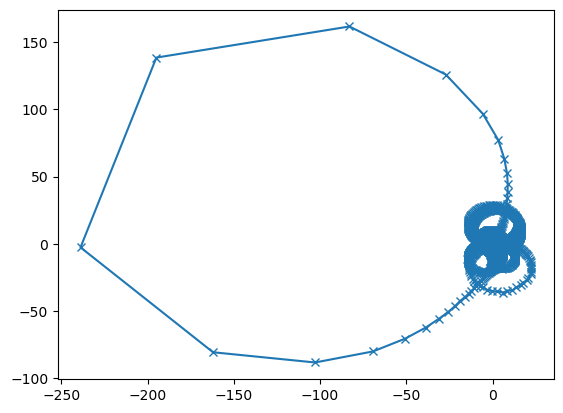

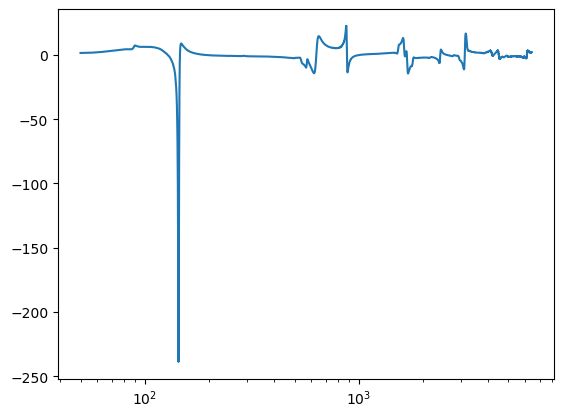

In [80]:
plt.figure(10)
plt.plot(tf.real, tf.imag, "x-")
plt.figure(11)
plt.plot(data["x_FRF_disp"][0], tf)
plt.xscale("log")

# Nyquist Plot (Laser With center reference )

In [90]:
import scipy.io as sio

data = sio.loadmat("../Data/laser/references/scanFlatBeamCornerMiddleLimit.mat")
ref = sio.loadmat("../Data/laser/references/FlatBeamRefCenter.mat")

tf_center = data["y_FRF_disp"][1] / ref["y_FRF_disp"]
tf_corner = data["y_FRF_disp"][0] / ref["y_FRF_disp"]
tf_center_dB = 20*np.log10(abs(data["y_FRF_disp"][1] / ref["y_FRF_disp"]))
tf_corner_dB = 20*np.log10(abs(data["y_FRF_disp"][0] / ref["y_FRF_disp"]))

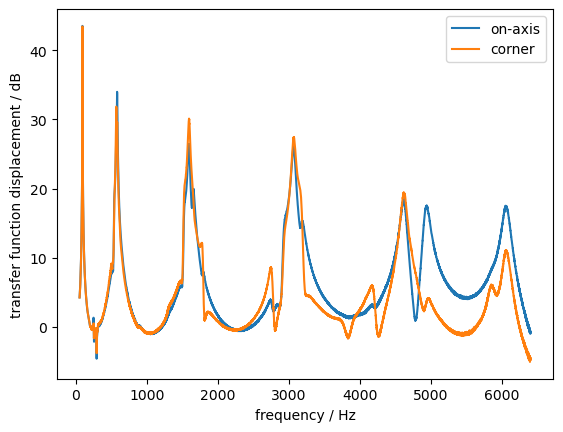

In [91]:
plt.plot(data["x_FRF_disp"][0], tf_center_dB.T, label="on-axis")
plt.plot(data["x_FRF_disp"][0], tf_corner_dB.T, label="corner")
plt.ylabel("transfer function displacement / dB")
plt.xlabel("frequency / Hz")
plt.xscale("linear")
plt.legend()

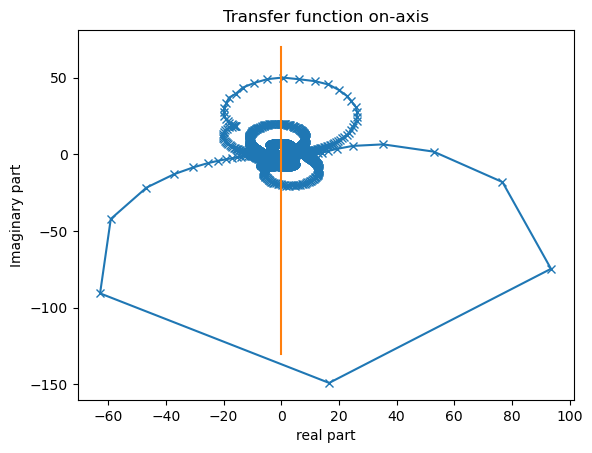

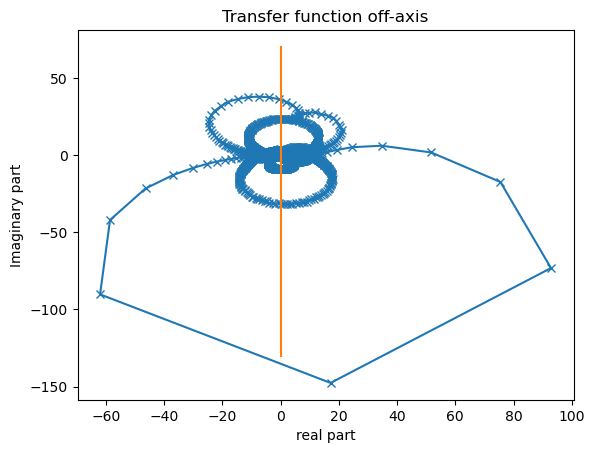

In [92]:
plt.figure(10)
plt.plot(tf_center.T.real, tf_center.T.imag, "x-")
plt.plot(np.zeros(2), [-130, 70])
plt.title("Transfer function on-axis")
plt.xlabel("real part")
plt.ylabel("Imaginary part")
plt.figure(11)
plt.title("Transfer function off-axis")
plt.plot(tf_corner.T.real, tf_corner.T.imag, "x-")
plt.xlabel("real part")
plt.ylabel("Imaginary part")
plt.plot(np.zeros(2), [-130, 70])

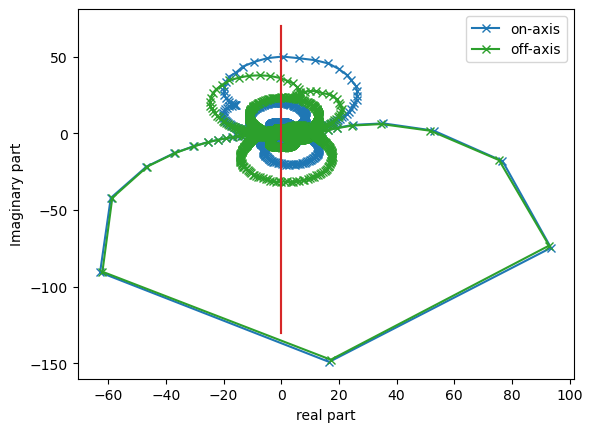

In [93]:
plt.figure(10)
plt.plot(tf_center.T.real, tf_center.T.imag, "x-", label="on-axis")
plt.plot(np.zeros(2), [-130, 70])
plt.plot(tf_corner.T.real, tf_corner.T.imag, "x-", label="off-axis")
plt.xlabel("real part")
plt.ylabel("Imaginary part")
plt.legend()
plt.plot(np.zeros(2), [-130, 70])

In [16]:
np.arange(1000,2250)

array([1000, 1001, 1002, ..., 2247, 2248, 2249])